### Анастасия Костяницына

<b>Задание 1.</b> Существуют решения для NER для русского языка, например, парсер Наташа. Давайте реализуем такую штуку: ваш код берет текст, находит в нем все упоминения людей -- а потом строит граф, считая связью факт соседства упоминаний на каком-то расстоянии В продвинутой версии — еще и визуализирует его, например, с помощью networkx + matplotlib

In [2]:
from natasha import NamesExtractor

In [1]:
from collections import defaultdict
from nltk import sent_tokenize
import re
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

In [63]:
extractor = NamesExtractor()

In [127]:
def open_data(path):
    
    '''
    Открытие файла, деление по предложениям.
    '''
  
    with open(path, 'r', encoding='utf-8') as f:
        text = f.read()
        text = sent_tokenize(text)

    return text


def name_extr(path):
    
    '''
    Достаем все именованные сущности, записываем в словарь, где ключом является номер предложения.
    Составляем полный список всех встретившихся имен.
    '''

    text = open_data(path)
    names = defaultdict(set)
    all_ = set()
    
    for index, sent in enumerate(text):
        
        matches = extractor(sent)
        
        for n in matches: 
            name = ' '.join([i for i in n.fact if isinstance(i, str)])
            names[index].add(name)
            all_.add(name)
        
    return names, list(all_)


def visualisation(path, dist):
    
    '''
    Создаем граф, создаем ребро там, где имена встречаются в допустимом окне. 
    dist - окно (сколько предложений справа и слева посмотреть)
    Рисуем график
    '''
    
    if not isinstance(dist, int) and dist < 0:
        raise ValueError('Enter correct distance value')
    
    ind_names, names = name_extr(path)

    G = nx.Graph()
    G.add_nodes_from(names)

    for sent_n in ind_names:

        values = ind_names.get(sent_n)
        
        for i in range(sent_n-dist, sent_n+dist+1):
            ans = ind_names.get(i)
            if ans != None:  
                for comb in combinations(values|ans, 2):
                    G.add_edge(*comb)
  

    nx.draw_networkx(G, pos=None, arrows=True, with_labels=True, node_size=30, font_size=10,
                    label='Упоминание имен в тексте на расстоянии +-{} предлож.'.format(dist))
    limits = plt.axis('off')
     
        

In [121]:
path = '/Users/Stoneberry/Desktop/Uni/Мага/dh_books/1903_Bryusov_Respublika Yuzhnogo Kresta.txt'

In [131]:
open_data(path)[100:110]

['Впрочем, показания всех очевидцев сходятся на том, что  в  июле\n  месяце нельзя было встретить семьи, где не было бы больного.',
 'При этом  число\n  здоровых неизменно уменьшалось,  так  как  началась  массовая  эмиграция  из\n  города, как из зачумленного места,  а  число  больных  увеличивалось.',
 'Можно\n  думать, что не далеки от истины те, кто утверждают,  что  в  августе  месяце\n  все, оставшиеся в Звездном городе, были поражены психическим расстройством.',
 'За первыми проявлениями эпидемии  можно  следить  по  местным  газетам,\n  заносившим их во все возраставшую м них рубрику: tarna contradicena.',
 'Так как\n  распознание болезни в ее первых стадиях  очень  затруднительно,  то  хроника\n  первых  дней  эпидемии  полна  комических  эпизодом.',
 'Заболевший   кондуктор\n  метрополитэна вместо того, чтобы получать деньги с  пассажиров,  сам  платил\n  им.',
 'Уличный  стражник,  обязанностью  которого  было  регулировать  уличное\n  движение, путал его в течение всего дня

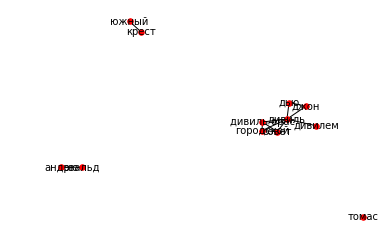

In [122]:
visualisation(path, 1) # окно в 1 предложение

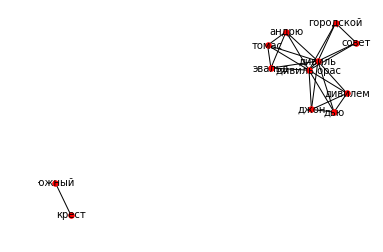

In [126]:
visualisation(path, 50) # окно в 50 предложений

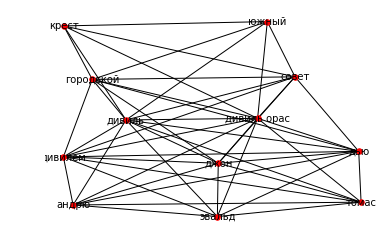

In [124]:
visualisation(path, 200) # окно в 200 предложений